<a href="https://colab.research.google.com/github/dkaratzas/ML2024-25/blob/main/Session%203%20-%20Logistic%20Regression/P3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/ML2024-25/blob/main/Session%203%20-%20Logistic%20Regression/P3_Logistic_Regression.ipynb>)

# Problems 3 - Logistic Regression

## 3.1 Logistic Regression

We are going train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} (J) = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_w(\textbf{x})$ is the sigmoid function of $w^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [1]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(X,y,max_iterations=10000, alpha=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations or until we have converged
    for iteration in range(max_iterations):
        f_x = sigmoid(np.dot(X, w))
        error = (f_x-y)
        gradient = np.dot(X.T , error) / m
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(f_x)-(1-y)*np.log(1-f_x)) / m )
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            print("Converged after {} iterations".format(iteration))
            break
            
    return [w, J]

def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model with parameters w,
    and return the predicted label of x.
    '''
    prob = sigmoid(np.dot(X, w))
    ret = np.zeros_like(prob) # These next three lines are just in order to be able to deal with single (vector) or multiple (matrix) inputs
    ret[prob > 0.5] = 1
    ret = ret.squeeze()
    return ret

Let's see how to use this code in a synthetic dataset. First load the data and plot it.

In [2]:
# Load the synthetic dataset
import pickle

with open('./P3data_linear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


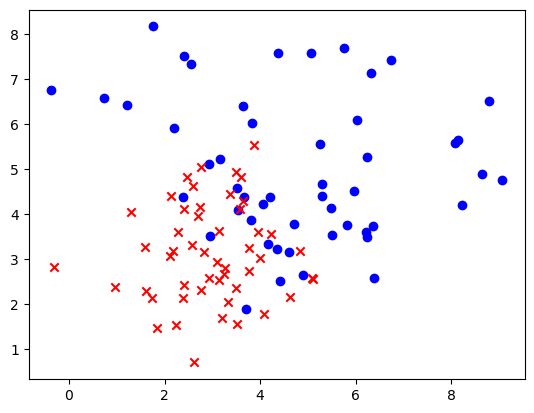

In [3]:
# Plot the data

%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

In [4]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) ) #The Design Matrix, which is the original data augmented with the first column of ones

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = classifyVector(Xaugmented, w)
print ("Training Accuracy :", np.sum(H == y) / m)


Converged after 5690 iterations
Training Accuracy : 0.82


Next we will define a function to plot the decision boundary, along with data, given a set of weights. You can accept this function as is.

In [5]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary(X, y, w):    
    #Plot data
    plt.scatter(X[:, 0], X[:,1], cmap = "Set1", c = y)

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):            
            z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

/tmp/ipykernel_212699/847439044.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))


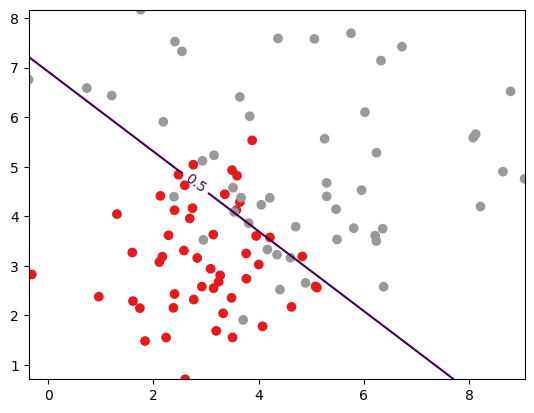

In [6]:
plotDecisionBoundary(X, y, w)

As can be seen in the previous plot a linear classifier fits poorly our data. That does not mean that the gradient descent has not converged, but the best possible solution using a line is not good at all. Check that the learning process has actually converged:

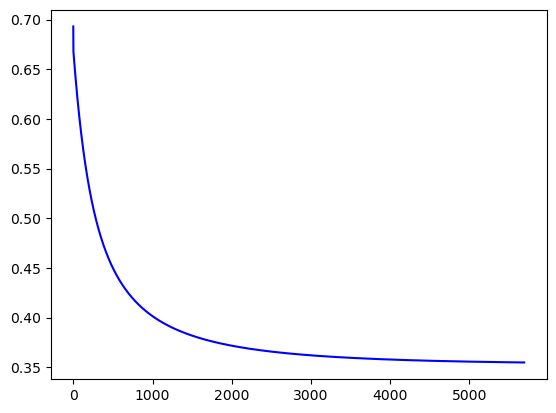

In [7]:
plt.plot(np.arange(len(J)), J, 'b')

## 3.2 Multi-class Classification

In [8]:
# Load the synthetic dataset
import pickle

with open('P3data_multiclass.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


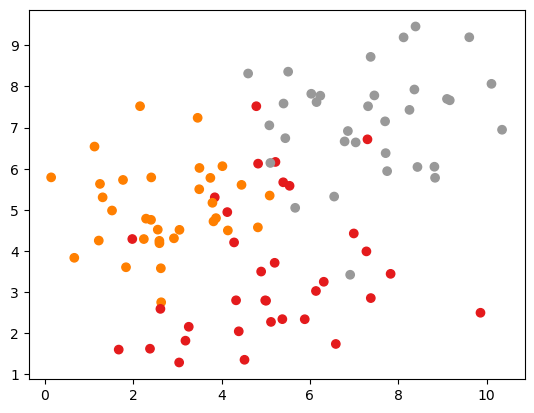

In [9]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], cmap = "Set1", c = y)
plt.show()

<font color="blue">Train three 1-vs-All Logistic Regression classifiers, one for each class, and plot the three decision boundaries</font>

Converged after 1993 iterations


/tmp/ipykernel_212699/847439044.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))


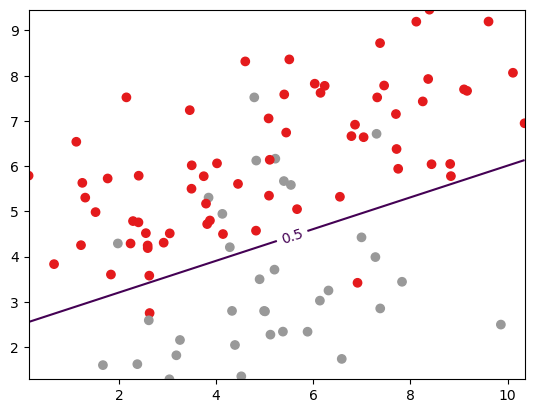

Converged after 2530 iterations


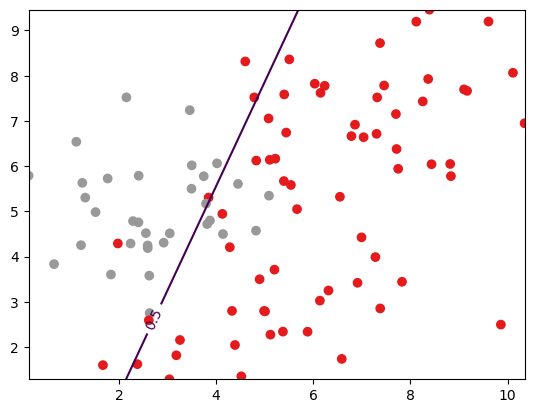

Converged after 9659 iterations


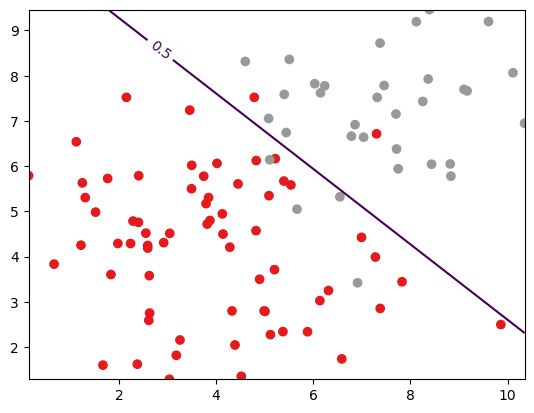

In [10]:
m, n = X.shape
ones = np.ones(shape=(m,1))
Xaug = np.hstack((ones, X))

classes_y = []
w = []
for cl in [0, 1, 2]:
    y_c = np.zeros_like(y)
    y_c[y==cl] = 1

    w_c, J = GradientDescent_logistic(Xaug, y_c)
    w.append(w_c) # This is needed later
    plotDecisionBoundary(X, y_c, w_c)

<font color="blue">Adapt the `classifyVector()` function (define a `classifyVectorMulticlass()` one) in order to be able to do multi-class classification. Then use it to calculate the accuracy of your multi-class classifier over the training set.</font>

In [11]:
def classifyVectorMulticlass(X, W):
    '''
    Evaluate the Logistic Regression model with parameters w,
    and return the predicted label of x.
    w here is a matrix, where each row is the 1 vs all classifier for the corresponding class
    '''
    W = np.array(W)
    probabilities = sigmoid(np.dot(X, W))
    # axis=1 since we want to get the argument (index)
    # of the larger number alongside the horizontal axis
    return np.argmax(probabilities, axis=1)

Here's some code to do a nice plot **assuming** you have defined correctly your `classifyVectorMulticlass(X, w)`

In [12]:
def get_accuracy(y_hat, y, X):
    m, n = X.shape
    y.reshape(m, 1)
    mean = np.sum(y_hat == y)
    return 100*(mean / m)
    

In [13]:
predictions = classifyVectorMulticlass(Xaug, w)

f'Training accuracy: {get_accuracy(predictions, y, Xaugmented)}%'

'Training accuracy: 3331.0%'

<font color='red'> I cannot figure out how to get the accuracy with this predictions. I guess there is an error with the `m` at the time of calculating the mean </font>

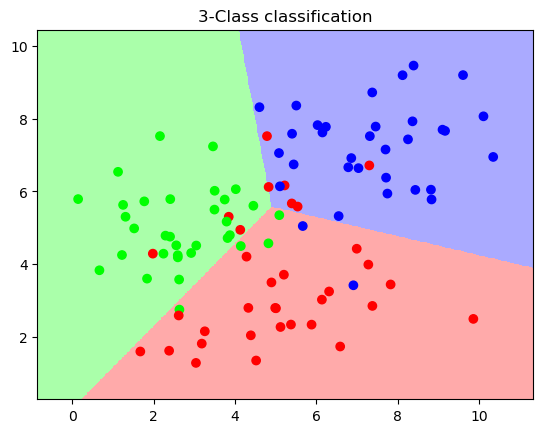

In [14]:
if ("classifyVectorMulticlass" in dir()): # Check if you have defined a function to classify a list of points
    # Create color maps
    from matplotlib.colors import ListedColormap

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    gridpts = np.c_[xx.ravel(), yy.ravel()]
    m, n = gridpts.shape # m is the number of samples and n is the number of features
    ones = np.ones(shape=(m, 1))
    gridpts = np.hstack( (ones, gridpts) )

    Z = classifyVectorMulticlass(gridpts, w)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification")

    plt.show()

---

Note how the probabilites are either extremely close to 1 or to 0, there is no middle point. Moreover, they are independent from each other (each one from one classifier), so if a datapoint is  between two decicion boundaries at the same time, it would get very close to 1 in both numbers, then i would get assigned to the higher one, which I think corresponds to the class with the closest "centroid of the cluster". 

---

## 3.3 Non-Linear Decision Boundaries

In [15]:
# Load the synthetic dataset
import pickle

with open('P3data_nonLinear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


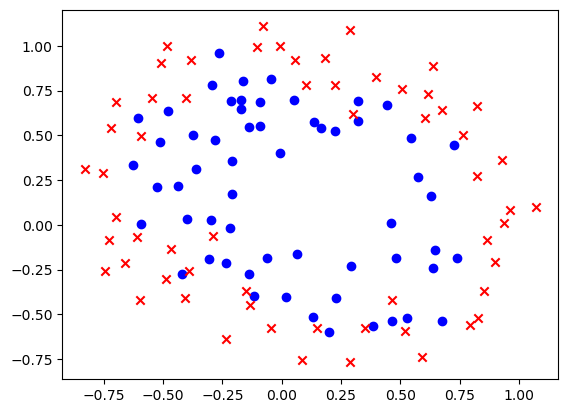

In [16]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

<font color="blue">Train a Logistic Regression classifier and draw its decision boundary over this new data. What do you observe?</font>

Converged after 273 iterations
Training accuracy 52.99%


/tmp/ipykernel_212699/847439044.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))


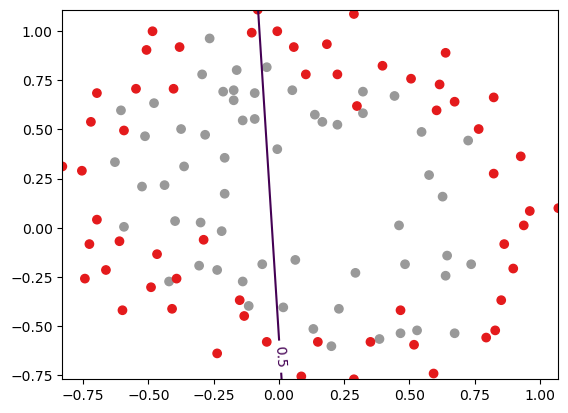

In [17]:
# Your Code Here
m, n = X.shape
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack((ones, X))
w, J = GradientDescent_logistic(Xaugmented, y)

y_hat = classifyVector(Xaugmented, w)
print(f'Training accuracy {get_accuracy(y_hat, y, Xaugmented):.2f}%')
plotDecisionBoundary(X, y, w)

---

A linear decision boundary (e.g. straight line) cannot classify correctly these two clases as we would require a non-linear decision boundary, since the clases would ideally be divided by circle or ellipse.

Moreover, it makes sense that the accuracy is half since the dataset is divided into two at the middle.

---

One way to fit the data better is to create more features from each data point. For example, if we map the original features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power we would get:

$\text{MapFeature}(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^5, x_2^6]$

As a result of this mapping, our vector of two features is transformed into a 28-D vector (28 . The Logistic Regression classifier trained on this high dimensional feature space will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

To make our life easier, we will make a function to do this mapping of features. Note also that before we can use these new features, we should normalise them. It seems like a good idea to include the normalisation into the same function.

Moreover since at the time of applying our model to new data we would need to normalise any such new data IN THE SAME WAY as the training data we used, it is wise to keep track of the means and sigmas we used for normalising. Therefore, we will return the means and sigmas from the function as well.

Then in the future we could ask the function to use these same means and sigmas for normalisation (instead of calculating them anew), by passing them as arguments. A clever way to do this would be to allow the function to take an array of means and an array of sigmas as arguments. If we do give some values for these, then the function will use these values. If not (so the default empty vector will be given) then the function would calculate these arrays from the data.

Below is the function that does just that. You can accept this code as is if you want.

In [18]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degrees = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degrees + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

Now, at the time of using this, we expect three things to be returned: the new features, the calculated means and the calculated standard deviations. So the right way to use it is as follows (example for features up to degree 3):

In [19]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degrees = deg)
print("------")
print("output has shape:", features.shape) # Should be 117 rows (equal to the number of data points) and 10 rows (equal to the new number of features)
print("Mean (and Sigma) has shape", mu.shape)
print("------")

------
output has shape: (117, 10)
Mean (and Sigma) has shape (10,)
------


<font color="blue">Create new features up to degree = 6, and then run gradient descent on these new features. How fast does this converge? What is your training accuracy now?</font>

In [20]:
#Your Code Here
degree = 6
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degrees = degree)
w, J = GradientDescent_logistic(features, y)

y_hat = classifyVector(features, w)
print("------")
print("output has shape:", features.shape)
print("Mean (and Sigma) has shape", mu.shape)
print("------")
print(f'Training accuracy {get_accuracy(y_hat, y, Xaugmented):.2f}%')

Converged after 5173 iterations
------
output has shape: (117, 28)
Mean (and Sigma) has shape (28,)
------
Training accuracy 87.18%


---

We need to compare the point of converge:
- 6 features and non-linear boundary: **5173** iterations 
- simple logistic regression with linear boundary: **273** iterations

There is a trade-off to be taken in terms of training time in order to make use of the non-linear boundary it seems. However, with this amount of data it should not matter.

---

Plotting your results using our old function does not work well now, as we want to plot in the original space, but our model works in the new feature space we created. We have to inform our plotting function about what kind of feature embedding (degrees, means and sigmas it should use). We update this below - once again, you can just accept this code as is.

In [21]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas, epochs=None, time_taken=None):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degrees = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w))
            
    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    if time_taken:
        plt.title(f'Degree = {degrees}, epochs = {epochs}, {time_taken:.2f}s')
    else:
        plt.title(f'Degree = {degrees}, epochs = {epochs}')
    plt.show()

<font color=blue>Use the function above, to draw the non-linear decision boundary you have found.</font>

/tmp/ipykernel_212699/3938119368.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(feature.dot(w))


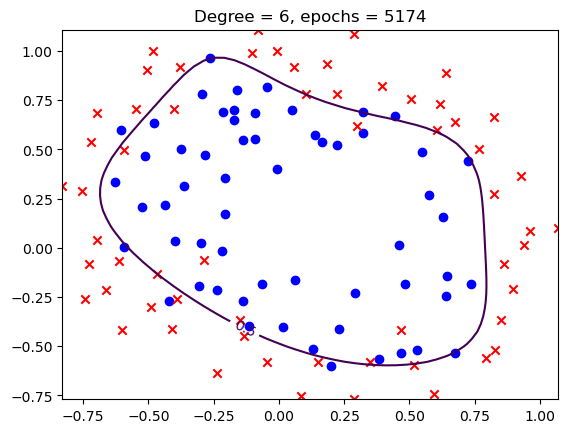

In [22]:
#Your Code Here
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees=degree, means=mu, sigmas=sigma, epochs=len(J))

<font color=blue>Now generate a different number of features by changing the value of `deg` (e.g. features up to degree 1, 2, 3, ...15), run gradient descent for different degrees and plot the decision boundary. What do you observe?

Converged after 98 iterations
Time for Gradient Descent at degree 1: 0.0084 seconds


/tmp/ipykernel_212699/3938119368.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(feature.dot(w))


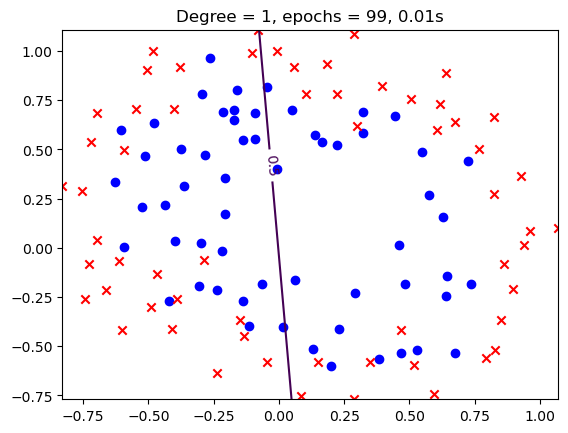

Converged after 2706 iterations
Time for Gradient Descent at degree 2: 0.1504 seconds


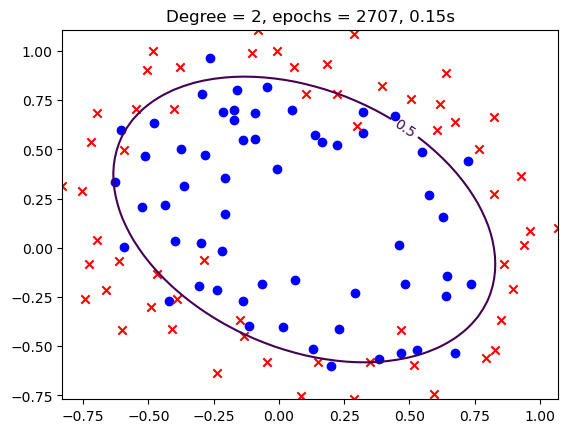

Converged after 2906 iterations
Time for Gradient Descent at degree 3: 0.1524 seconds


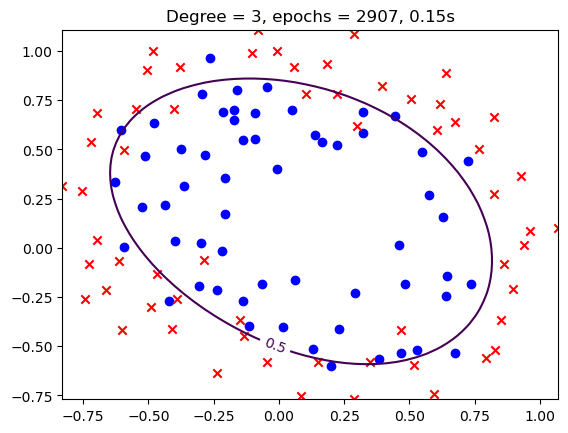

Converged after 3417 iterations
Time for Gradient Descent at degree 4: 0.1772 seconds


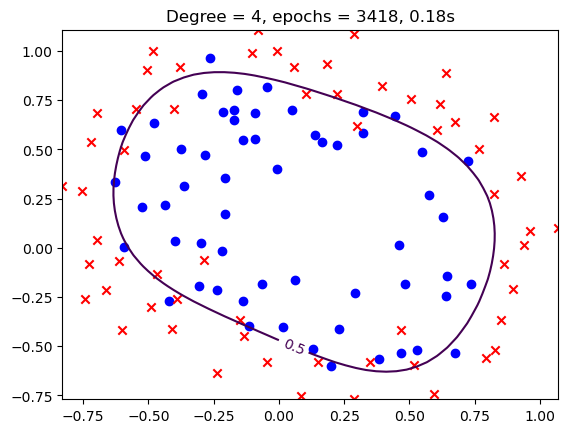

Converged after 4898 iterations
Time for Gradient Descent at degree 5: 0.2608 seconds


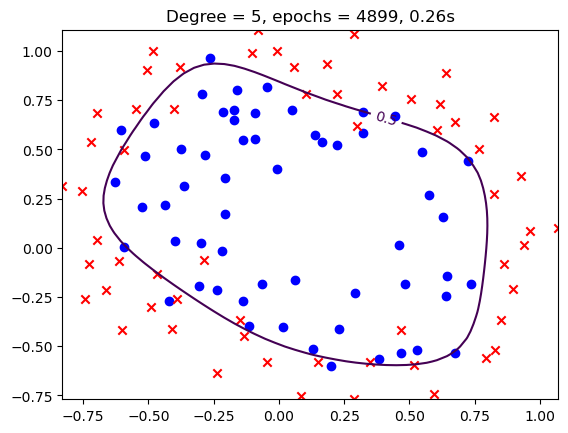

Converged after 5173 iterations
Time for Gradient Descent at degree 6: 0.2711 seconds


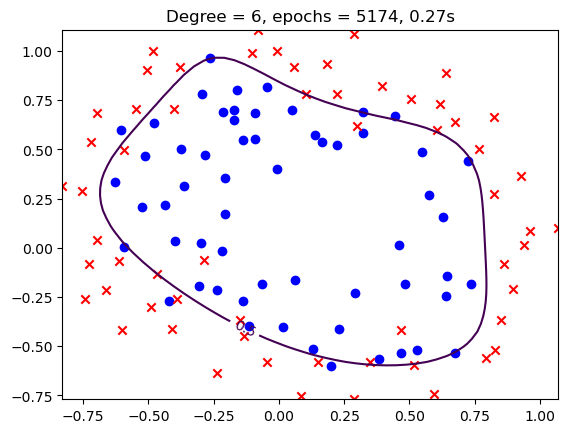

Converged after 5163 iterations
Time for Gradient Descent at degree 7: 0.2791 seconds


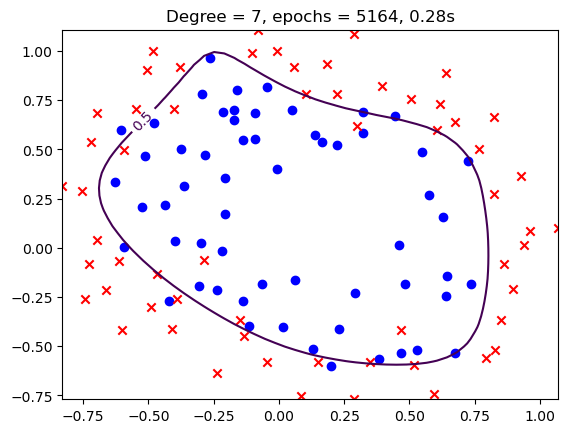

Converged after 6968 iterations
Time for Gradient Descent at degree 8: 0.3725 seconds


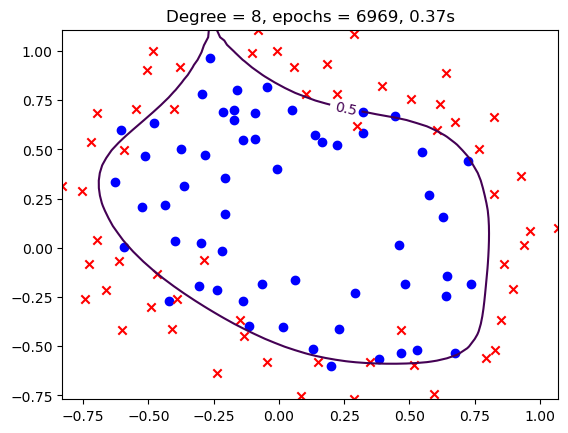

Converged after 9064 iterations
Time for Gradient Descent at degree 9: 0.4833 seconds


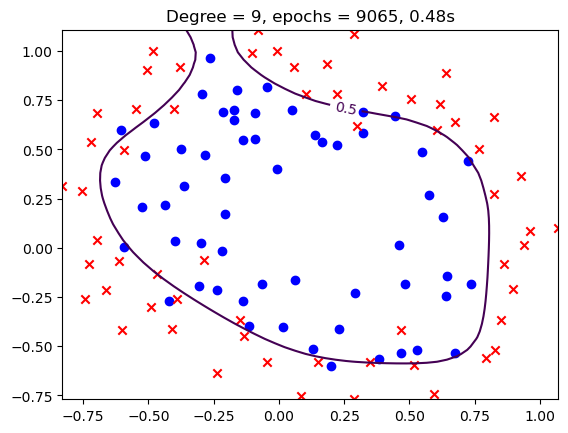

Time for Gradient Descent at degree 10: 0.5341 seconds


/tmp/ipykernel_212699/1441430784.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-X))


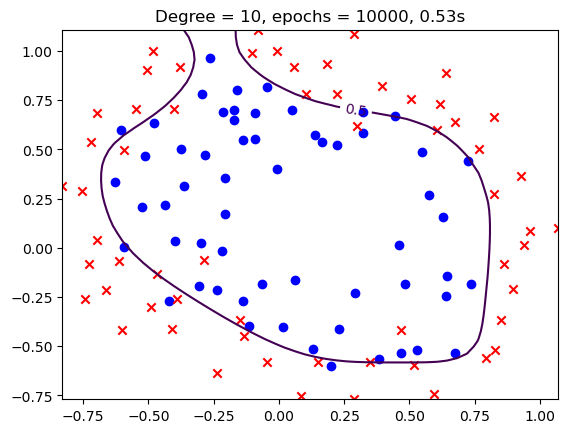

Time for Gradient Descent at degree 11: 0.5459 seconds


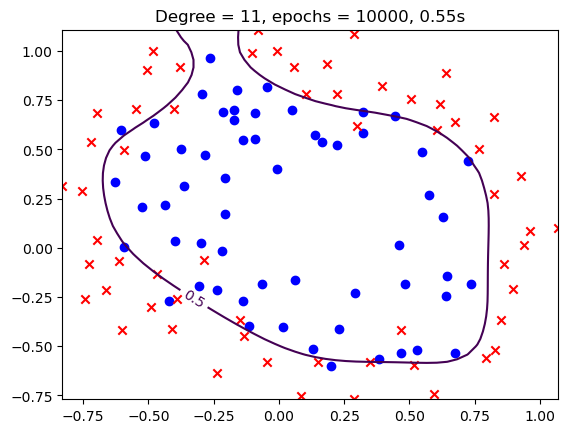

Time for Gradient Descent at degree 12: 0.5534 seconds


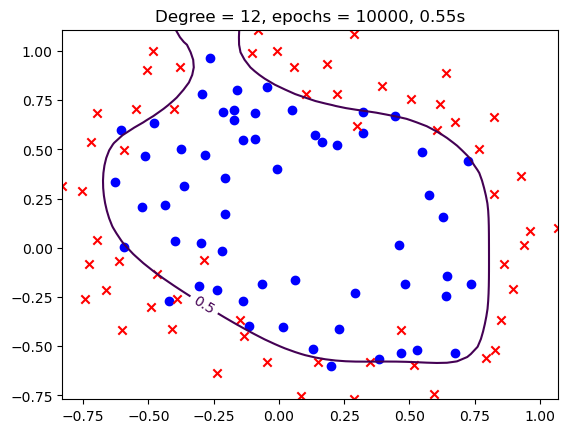

Time for Gradient Descent at degree 13: 0.5441 seconds


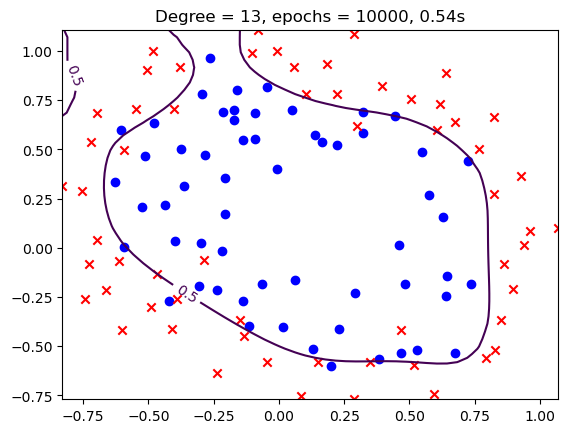

Time for Gradient Descent at degree 14: 0.5484 seconds


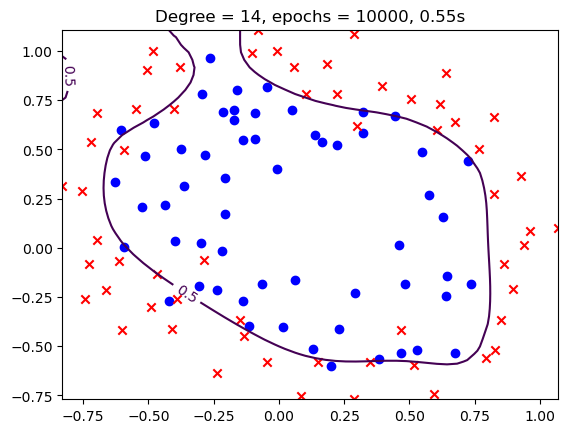

Time for Gradient Descent at degree 15: 0.5611 seconds


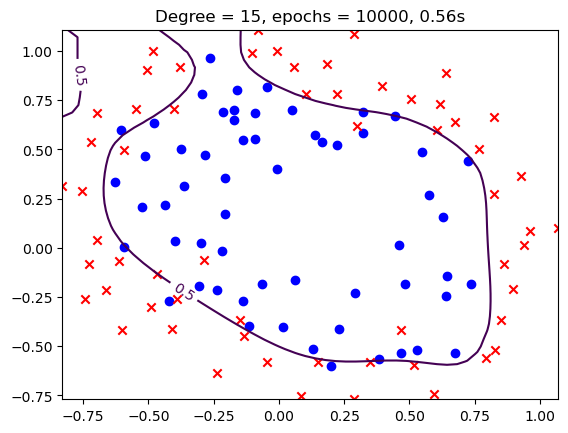

In [38]:
# Your Code Here
import time
record_time = []
record_cost = []
for feature_degree in range(1, 16):
    features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:, 0], X[:, 1], degrees=feature_degree)
    
    start_time = time.time()  # Start timer
    w, J = GradientDescent_logistic(features, y)
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time
    
    record_time.append(elapsed_time)
    record_cost.append(J[-1])
    print(f'Time for Gradient Descent at degree {feature_degree}: {elapsed_time:.4f} seconds')
    
    plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees=feature_degree, means=mu, sigmas=sigma, epochs=len(J), time_taken=elapsed_time)

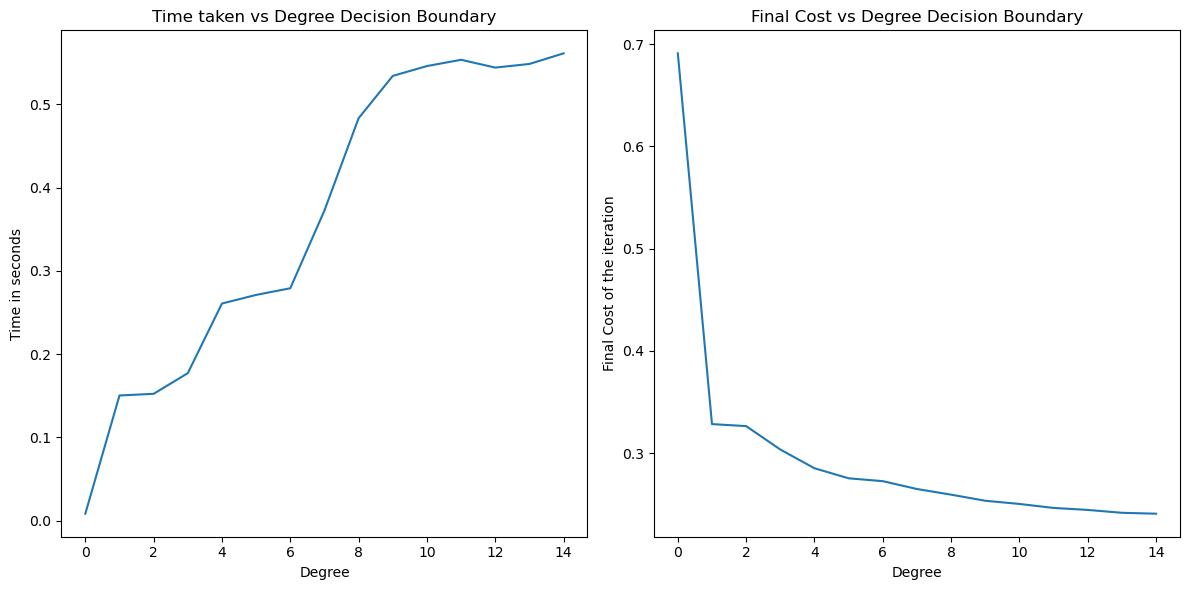

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(record_time)), record_time)
plt.title('Time taken vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Time in seconds')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(record_cost)), record_cost)
plt.title('Final Cost vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Final Cost of the iteration')

plt.tight_layout()
plt.show()


---

The time taken seems to stabilize from the 9-10 degree. However, it does not correlate with the final cost, which seems start to converge much earlier. Since I thought that the execution stopped at 0.5s because the model converged I wanted to compare these two graphs.

The model seems to be fitted to the data pretty well. It is pretty clear the difference that the degrees have to the shape of the decision boundary, it starts as a line and then a circle, to then fit the data nicely.

Also I want to mention how the boundary becomes an open "surface" instead of a closed loop. I guess that having data that behaves exactly like this could be rare. Having another instances of the dataset, perhaps there will be some red points at the top of the graph that forced the decision boundary to be a closed surface.

---


I also wanted to see what happens if the max amount of iterations is increased (e.g. by an order of magnitude). It just seems to take more time in each degree increase. What its important is that as we increase the degree it takes more iterations to get to the converge point. Note that epsilon is not changed. Thus, we can say that is harder to train a model with a more complex decision boundary, it takes more iterations and more compute time.

**TLDR: it takes longer because a single iterations takes more time, and more iterations are needed.**

From now on the iteration cap the original amount of 10000. 

In [25]:
record_time = []
record_cost = []
for feature_degree in range(1, 50):
    features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:, 0], X[:, 1], degrees=feature_degree)
    
    start_time = time.time()  # Start timer
    w, J = GradientDescent_logistic(features, y)
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time
    
    record_time.append(elapsed_time)
    record_cost.append(J[-1])
    print(f'Time for Gradient Descent at degree {feature_degree}: {elapsed_time:.4f} seconds')

Converged after 98 iterations
Time for Gradient Descent at degree 1: 0.0074 seconds
Converged after 2706 iterations
Time for Gradient Descent at degree 2: 0.1818 seconds
Converged after 2906 iterations
Time for Gradient Descent at degree 3: 0.1917 seconds
Converged after 3417 iterations
Time for Gradient Descent at degree 4: 0.2355 seconds
Converged after 4898 iterations
Time for Gradient Descent at degree 5: 0.3183 seconds
Converged after 5173 iterations
Time for Gradient Descent at degree 6: 0.3335 seconds
Converged after 5163 iterations
Time for Gradient Descent at degree 7: 0.3421 seconds
Converged after 6968 iterations
Time for Gradient Descent at degree 8: 0.5078 seconds
Converged after 9064 iterations
Time for Gradient Descent at degree 9: 0.5933 seconds
Time for Gradient Descent at degree 10: 0.6937 seconds
Time for Gradient Descent at degree 11: 0.6804 seconds
Time for Gradient Descent at degree 12: 0.7109 seconds
Time for Gradient Descent at degree 13: 0.6914 seconds
Time for

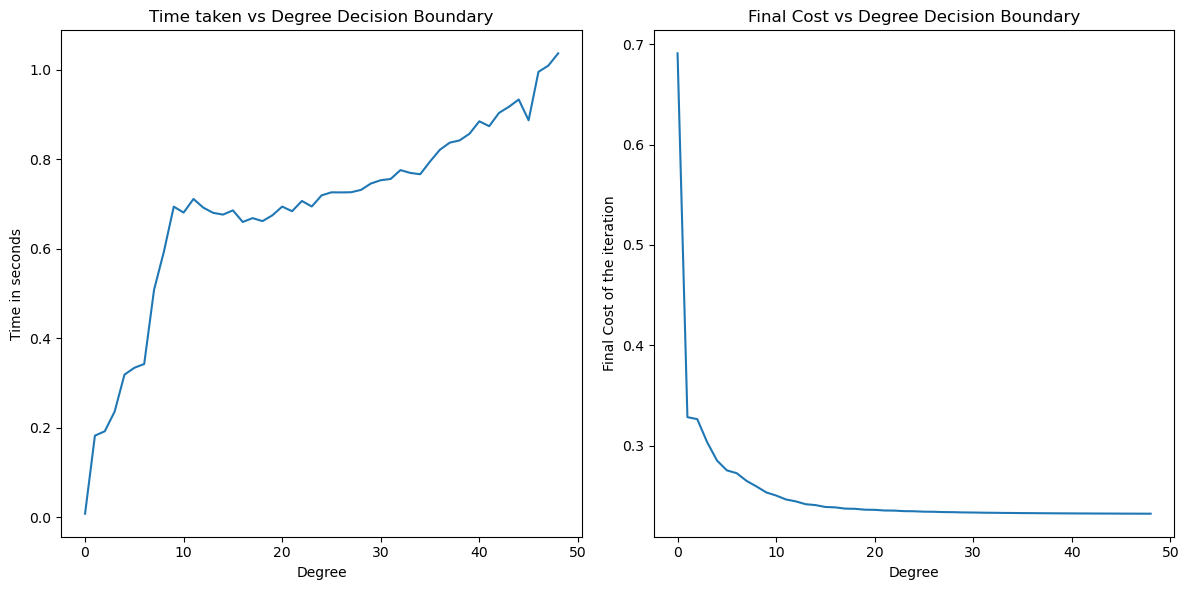

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(record_time)), record_time)
plt.title('Time taken vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Time in seconds')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(record_cost)), record_cost)
plt.title('Final Cost vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Final Cost of the iteration')

plt.tight_layout()
plt.show()

---

Moreover, increasing the iterations drastically (to 50), we can assume that there is no correlation between the time that takes the algorithm, to when the model converges. Which it makes more sense to me, since the calculations that are being done with a larges degree would take more time, even if the algorithms performs the same amount of iterations.

It was just a considence that at degree=15, both plots seemed to come to a still point.

Also note that the max iterations the model can take are 10,000 that is while when printing it stops saying on which iteration number it stopped.

---

Going up to 100 degrees, it just explotes at 80 XD. I would guess that the model "converges" in the sense that the cost despite being extremely high it stays stable for a while.

DO NOT EXECUTE, it takes a lot of time for matplotlib to show the plots. But its fine, I want to practice for when we do deep learning, which I expect some runs will take quite a while (planning on having a 3090 by then).

Converged after 98 iterations
Time for Gradient Descent at degree 1: 0.0076 seconds
Converged after 2706 iterations
Time for Gradient Descent at degree 2: 0.1462 seconds
Converged after 2906 iterations
Time for Gradient Descent at degree 3: 0.1529 seconds
Converged after 3417 iterations
Time for Gradient Descent at degree 4: 0.1770 seconds
Converged after 4898 iterations
Time for Gradient Descent at degree 5: 0.2546 seconds
Converged after 5173 iterations
Time for Gradient Descent at degree 6: 0.2698 seconds
Converged after 5163 iterations
Time for Gradient Descent at degree 7: 0.2766 seconds
Converged after 6968 iterations
Time for Gradient Descent at degree 8: 0.3726 seconds
Converged after 9064 iterations
Time for Gradient Descent at degree 9: 0.4851 seconds
Time for Gradient Descent at degree 10: 0.5356 seconds


/tmp/ipykernel_212699/3938119368.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(feature.dot(w))
/tmp/ipykernel_212699/1441430784.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-X))


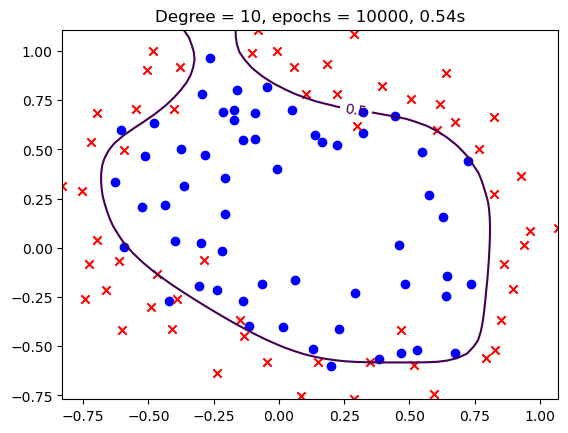

Time for Gradient Descent at degree 11: 0.5439 seconds
Time for Gradient Descent at degree 12: 0.5417 seconds
Time for Gradient Descent at degree 13: 0.5451 seconds
Time for Gradient Descent at degree 14: 0.5506 seconds
Time for Gradient Descent at degree 15: 0.5770 seconds
Time for Gradient Descent at degree 16: 0.5555 seconds
Time for Gradient Descent at degree 17: 0.5632 seconds
Time for Gradient Descent at degree 18: 0.5586 seconds
Time for Gradient Descent at degree 19: 0.5900 seconds
Time for Gradient Descent at degree 20: 0.5887 seconds


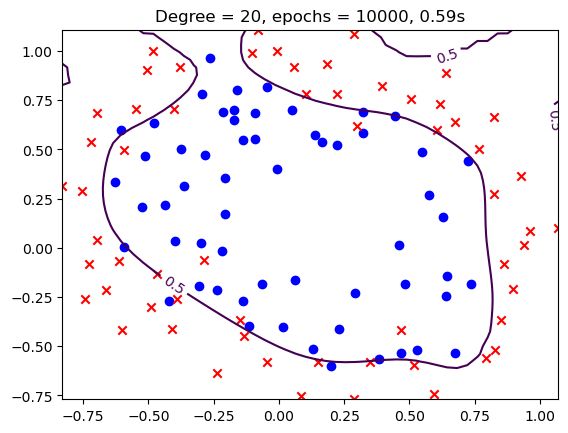

Time for Gradient Descent at degree 21: 0.5774 seconds
Time for Gradient Descent at degree 22: 0.5823 seconds
Time for Gradient Descent at degree 23: 0.5914 seconds
Time for Gradient Descent at degree 24: 0.5935 seconds
Time for Gradient Descent at degree 25: 0.5998 seconds
Time for Gradient Descent at degree 26: 0.5964 seconds
Time for Gradient Descent at degree 27: 0.6079 seconds
Time for Gradient Descent at degree 28: 0.6228 seconds
Time for Gradient Descent at degree 29: 0.6319 seconds
Time for Gradient Descent at degree 30: 0.6368 seconds


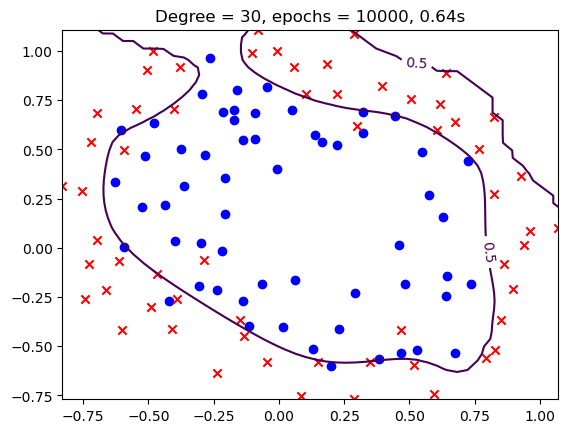

Time for Gradient Descent at degree 31: 0.8620 seconds
Time for Gradient Descent at degree 32: 0.8018 seconds
Time for Gradient Descent at degree 33: 0.7991 seconds
Time for Gradient Descent at degree 34: 0.8124 seconds
Time for Gradient Descent at degree 35: 0.8109 seconds
Time for Gradient Descent at degree 36: 0.8302 seconds
Time for Gradient Descent at degree 37: 0.8544 seconds
Time for Gradient Descent at degree 38: 0.7817 seconds
Time for Gradient Descent at degree 39: 0.8578 seconds
Time for Gradient Descent at degree 40: 0.8619 seconds


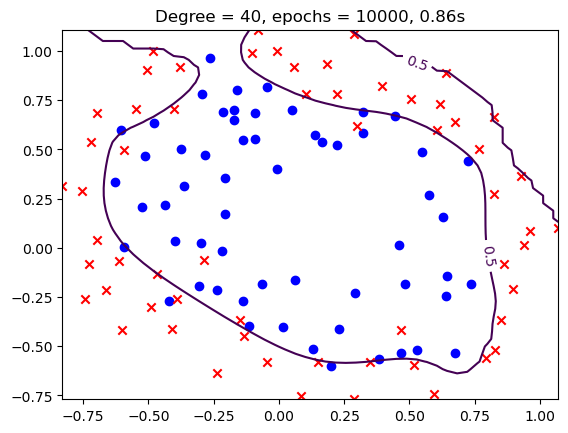

Time for Gradient Descent at degree 41: 0.9619 seconds
Time for Gradient Descent at degree 42: 1.0212 seconds
Time for Gradient Descent at degree 43: 0.9120 seconds
Time for Gradient Descent at degree 44: 0.9448 seconds
Time for Gradient Descent at degree 45: 0.9270 seconds
Time for Gradient Descent at degree 46: 1.0884 seconds
Time for Gradient Descent at degree 47: 1.0094 seconds
Time for Gradient Descent at degree 48: 1.0401 seconds
Time for Gradient Descent at degree 49: 1.0440 seconds
Time for Gradient Descent at degree 50: 1.0397 seconds


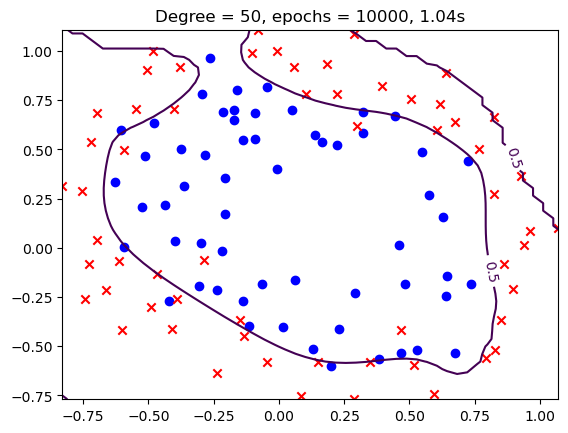

Time for Gradient Descent at degree 51: 1.4551 seconds
Time for Gradient Descent at degree 52: 1.2074 seconds
Time for Gradient Descent at degree 53: 1.1734 seconds
Time for Gradient Descent at degree 54: 1.3082 seconds
Time for Gradient Descent at degree 55: 1.3554 seconds
Time for Gradient Descent at degree 56: 1.2566 seconds
Time for Gradient Descent at degree 57: 1.2777 seconds
Time for Gradient Descent at degree 58: 1.2730 seconds
Time for Gradient Descent at degree 59: 1.4549 seconds
Time for Gradient Descent at degree 60: 1.3057 seconds


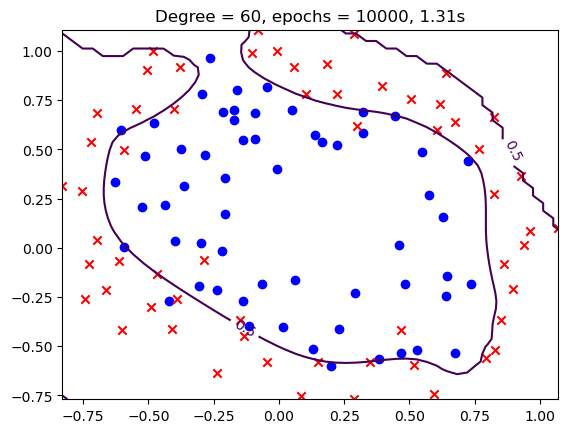

Time for Gradient Descent at degree 61: 1.3867 seconds
Time for Gradient Descent at degree 62: 1.4631 seconds
Time for Gradient Descent at degree 63: 1.4608 seconds
Time for Gradient Descent at degree 64: 1.5394 seconds
Time for Gradient Descent at degree 65: 1.5527 seconds
Time for Gradient Descent at degree 66: 1.5138 seconds
Time for Gradient Descent at degree 67: 1.7034 seconds
Time for Gradient Descent at degree 68: 1.5548 seconds
Time for Gradient Descent at degree 69: 1.6046 seconds
Time for Gradient Descent at degree 70: 1.8575 seconds


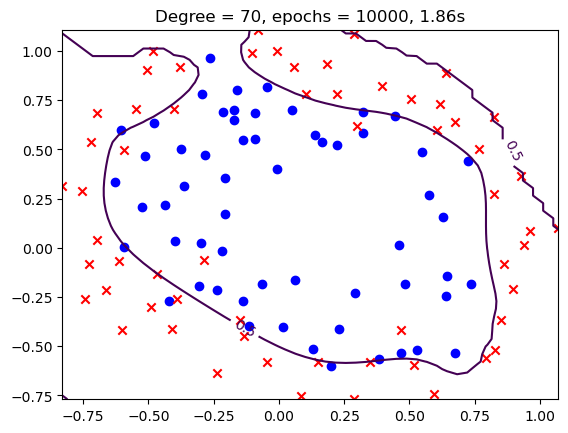

Time for Gradient Descent at degree 71: 1.7463 seconds
Time for Gradient Descent at degree 72: 1.9730 seconds
Time for Gradient Descent at degree 73: 2.0057 seconds
Time for Gradient Descent at degree 74: 1.9446 seconds
Time for Gradient Descent at degree 75: 1.7288 seconds
Time for Gradient Descent at degree 76: 1.7170 seconds
Time for Gradient Descent at degree 77: 2.1280 seconds
Time for Gradient Descent at degree 78: 1.8810 seconds
Time for Gradient Descent at degree 79: 2.0111 seconds
Time for Gradient Descent at degree 80: 2.0218 seconds


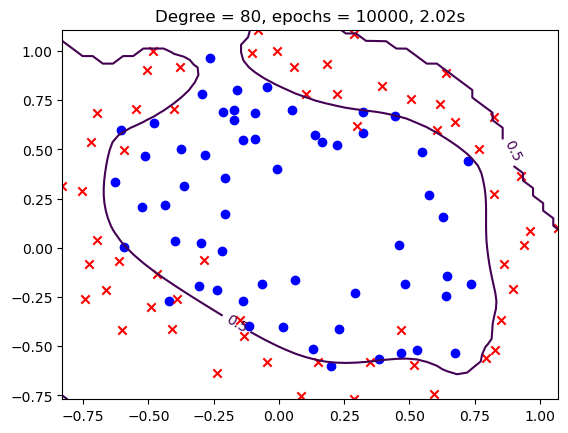

Converged after 19 iterations
Time for Gradient Descent at degree 81: 0.0085 seconds
Converged after 16 iterations
Time for Gradient Descent at degree 82: 0.0035 seconds
Converged after 14 iterations
Time for Gradient Descent at degree 83: 0.0032 seconds
Converged after 14 iterations
Time for Gradient Descent at degree 84: 0.0047 seconds
Converged after 12 iterations
Time for Gradient Descent at degree 85: 0.0061 seconds
Converged after 12 iterations
Time for Gradient Descent at degree 86: 0.0037 seconds
Converged after 12 iterations
Time for Gradient Descent at degree 87: 0.0034 seconds
Converged after 10 iterations
Time for Gradient Descent at degree 88: 0.0021 seconds
Converged after 6 iterations
Time for Gradient Descent at degree 89: 0.0016 seconds
Converged after 6 iterations
Time for Gradient Descent at degree 90: 0.0017 seconds


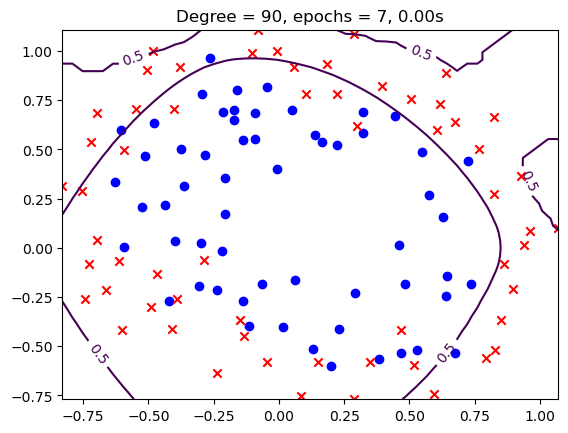

Converged after 6 iterations
Time for Gradient Descent at degree 91: 0.0015 seconds
Converged after 6 iterations
Time for Gradient Descent at degree 92: 0.0029 seconds
Converged after 5 iterations
Time for Gradient Descent at degree 93: 0.0014 seconds
Converged after 5 iterations
Time for Gradient Descent at degree 94: 0.0014 seconds
Converged after 5 iterations
Time for Gradient Descent at degree 95: 0.0014 seconds
Converged after 4 iterations
Time for Gradient Descent at degree 96: 0.0012 seconds
Converged after 4 iterations
Time for Gradient Descent at degree 97: 0.0013 seconds
Converged after 4 iterations
Time for Gradient Descent at degree 98: 0.0014 seconds
Converged after 4 iterations
Time for Gradient Descent at degree 99: 0.0012 seconds


In [41]:
record_time = []
record_cost = []
for feature_degree in range(1, 100):
    features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:, 0], X[:, 1], degrees=feature_degree)
    
    start_time = time.time()  # Start timer
    w, J = GradientDescent_logistic(features, y)
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time
    
    record_time.append(elapsed_time)
    record_cost.append(J[-1])
    print(f'Time for Gradient Descent at degree {feature_degree}: {elapsed_time:.4f} seconds')
    

    # plotting every 10 iterations
    if feature_degree % 10 == 0:
        plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees=feature_degree, means=mu, sigmas=sigma, epochs=len(J), time_taken=elapsed_time)


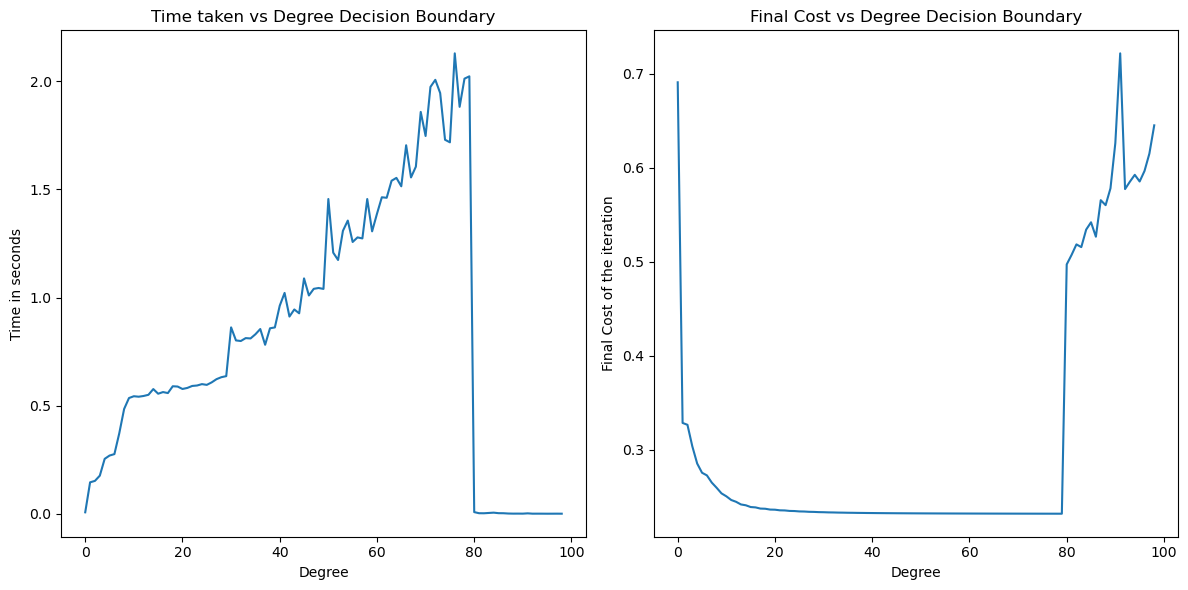

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(record_time)), record_time)
plt.title('Time taken vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Time in seconds')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(record_cost)), record_cost)
plt.title('Final Cost vs Degree Decision Boundary')
plt.xlabel('Degree')
plt.ylabel('Final Cost of the iteration')

plt.tight_layout()
plt.show()

As we saw before, as we increase the degree we should also increase the max iterations. Perhaps doing this solve the "explosion". I do not want to perfom more tests because the maximum size to upload to the CV is 5MB.

If you are reading this, thank you, there is a lot of text (and code).